In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
import os
import h5py

/glob/intel-python/versions/2018u2/intelpython3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [76]:
dir='datac/dataa/train/'
image=np.array(cv2.imread(dir+os.listdir(dir)[700]))
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
im=cv2.resize(image,(64,64))
X_train=cv2.cvtColor(im,cv2.COLOR_RGB2GRAY).reshape(1,-1)
X_train=X_train.T
X_train.shape

In [4]:
#Loading and flattening the dataset

mn=721
Y=np.zeros((36237,12288))
X=np.zeros((36237,4096))
k=0

dir='datac/dataa/train/'
for filename in os.listdir(dir):
    #file='res/image1/image{0}.jpg'.format(var+1)
    img=cv2.imread(dir+filename)
    img=cv2.resize(img,(64,64))
    im=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY).reshape(1,-1)
    X[k]=im.reshape(1,-1)
    Y[k]=img.reshape(1,64*64*3)
    #print(k+1,filename)
    k=k+1
    if k==721:
        break

In [5]:
#Dividing the dataset into Training and Test set

nm=721
m=int(np.floor(90*nm/100))

X_train=X[0:m,:].T
Y_train=Y[0:m,:].T
X_test=X[m:nm,:].T
Y_test=Y[m:nm,:].T
print('X_train if of size {}'.format(X_train.shape))
print('Y_train if of size {}'.format(Y_train.shape))
print('X_test if of size {}'.format(X_test.shape))
print('Y_test if of size {}'.format(Y_test.shape))
print('Total examples : {}'.format(Y_test.shape[1]+Y_train.shape[1]))


X_train if of size (4096, 648)
Y_train if of size (12288, 648)
X_test if of size (4096, 73)
Y_test if of size (12288, 73)
Total examples : 721



output=pred.T

a=100
for var in range(5):
    image=output[var+a].reshape(64,64,3)
    image=np.uint8(image)
    image=cv2.resize(image,(256,256))
    plt.figure(var+1)
    plt.imshow(image)

plt.show()

In [37]:
#Creating placeholder to pass training data

def create_placeholder(n_x):
    X=tf.placeholder(dtype=tf.float32,shape=[n_x,None],name='X')
    
    return X


In [38]:
def fetch_parameters(param):
    
    W1=tf.Variable(param['W1'],[12288,4096],dtype=tf.float32)
    b1=tf.Variable(param['b1'],[12288,1],dtype=tf.float32)
    W2=tf.Variable(param['W2'],[12288,12288],dtype=tf.float32)
    b2=tf.Variable(param['b2'],[12288,1],dtype=tf.float32)
    
    #print(type(param['W1']))
    #W1=param['W1'],
    #b1=param['b1'],
    #W2=param['W2'],
    #b2=param['b2']
    
    parameters={
        "W1":W1,
        "b1":b1,
        "W2":W2,
        "b2":b2
    }
    
    return parameters


In [39]:
#Forward propagation

def forward(X,parameters):
    
    W1=parameters['W1']
    b1=parameters['b1']
    W2=parameters['W2']
    b2=parameters['b2']
   
    A1=tf.add(tf.matmul(W1,X),b1)
    A2=tf.add(tf.matmul(W2,A1),b2)
    
    return A2


In [55]:
def predict_b(X_train,parameters=None):
    
    W1=parameters['W1']
    b1=parameters['b1']
    W2=parameters['W2']
    b2=parameters['b2']
    
    X=np.float32(X_train)
    
    A1=np.add(np.matmul(W1,X),b1)
    A2=np.add(np.matmul(W2,A1),b2)
    
    return A2
    

In [40]:
def predict(X_train,param=None):
    
    tf.reset_default_graph()
    (n_x,_)=X_train.shape
    
    #create palceholders 
    X=create_placeholder(n_x)
    
    para=fetch_parameters(param)
    
    A2=forward(X,para)
    
    #Initialize all variables
    init=tf.global_variables_initializer()
    
    #Start session
    with tf.Session() as session:
        session.run(init)
        result=session.run(A2,feed_dict={X:X_train})
        
    return result

In [36]:
param={}
filename = 'params1.hdf5'
f = h5py.File(filename, 'r')
param['W1']=f['w1'][()]
param['b1']=f['b1'][()]
param['W2']=f['w2'][()]
param['b2']=f['b2'][()]
cost=f['cost'][()]
f.close()

In [71]:
pred=predict_b(X_train=X_train,parameters=param)

pr=(pred.T).reshape(64,64,3)
pr=cv2.resize(pr,(256,256))
pr=np.uint8(pr)
plt.imshow(pr)
plt.show()

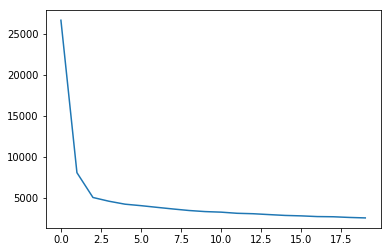

In [11]:
cost=list(cost)
cost.remove(404)
plt.plot(cost)
plt.show()